there is no significant relationship between the condition of the house and its selling price (rated 1 to 5)

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("cleaned_data.csv")

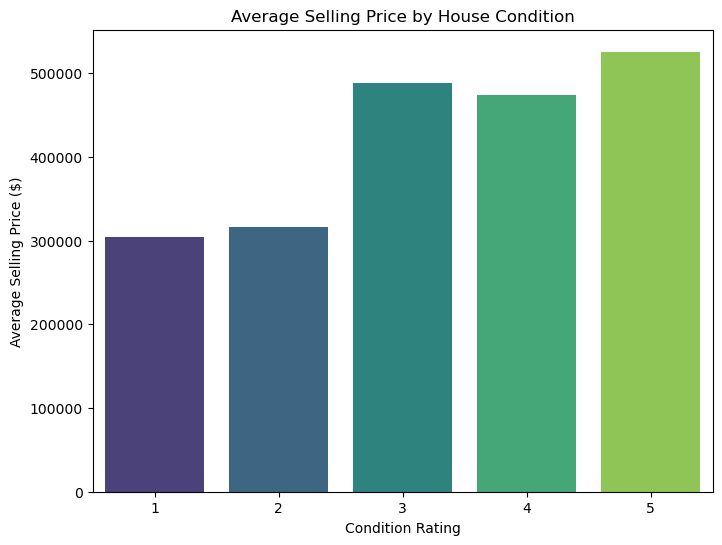

In [6]:
# Calculate average selling price for each condition rating
avg_price_by_condition = df.groupby('condition')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='condition', y='price', data=avg_price_by_condition, palette='viridis')
plt.title('Average Selling Price by House Condition')
plt.xlabel('Condition Rating')
plt.ylabel('Average Selling Price ($)')
plt.show()


In [9]:
import numpy as np
import statsmodels.api as sm

# Read data from CSV file
df = pd.read_csv("cleaned_data.csv")

# Add constant for intercept term
X = sm.add_constant(df['condition'])

# Fit OLS (Ordinary Least Squares) model
model = sm.OLS(df['price'], X).fit()

# Print regression results
print(model.summary())

# Hypothesis testing
# Null hypothesis: There is no relationship between house condition and selling price (slope = 0)
# Alternative hypothesis: There is a relationship between house condition and selling price (slope != 0)

# Get p-value for the condition coefficient
p_value = model.pvalues['condition']

# Set significance level
alpha = 0.05

# Check if p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between house condition and selling price.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between house condition and selling price.")


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     24.30
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           8.28e-07
Time:                        12:38:15   Log-Likelihood:            -2.9632e+05
No. Observations:               21597   AIC:                         5.927e+05
Df Residuals:                   21595   BIC:                         5.927e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.474e+05   7990.699     55.993      0.0